In [10]:
import pandas as pd

# Load the cleaned CSV file
cleaned_reviews = "air_nz_cleaned_data.csv"
reviews_df = pd.read_csv(cleaned_reviews)

reviews_df

,date,header,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,wifi_&_connectivity,value_for_money,recommended,inflight_entertainment,verified_status,review_content
0,2024-08-29,the legroom was huge,9,A320,Family Leisure,Economy Class,Auckland to Queenstown,December 2023,5.0,5.0,5.0,5.0,4.0,5.0,True,-1.0,False,I was honestly quite surprised about Air New Z...
1,2024-08-19,getting worse by the day,3,NaN,Business,Economy Class,Auckland to Napier,August 2024,4.0,5.0,-1.0,5.0,-1.0,1.0,False,-1.0,False,Air New Zealand domestic service is getting wo...
2,2024-08-13,never fly Air New Zealand again,1,ATR-72,Family Leisure,Economy Class,Napier to Auckland,June 2024,3.0,4.0,-1.0,1.0,-1.0,1.0,False,-1.0,True,Air New Zealand bumped us off our flight on th...
3,2024-07-29,has been going downhill,1,NaN,Solo Leisure,Business Class,San Francisco to Queenstown via Auckland,August 2023,2.0,3.0,2.0,1.0,1.0,2.0,False,2.0,False,"Very unfortunately the service, care, and qual..."
4,2024-07-19,Cabin crew and aircraft were great,10,A320N,Solo Leisure,Economy Class,Auckland to Hobart,December 2023,4.0,5.0,4.0,4.0,-1.0,5.0,True,-1.0,True,Check-in was efficient; boarding and departure...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2013-05-12,Air New Zealand customer review,3,NaN,NaN,Economy Class,NaN,NaN,3.0,2.0,3.0,-1.0,-1.0,2.0,False,4.0,False,I have flown with Air New Zealand for several ...
745,2013-05-10,Air New Zealand customer review,10,NaN,NaN,Premium Economy,NaN,NaN,5.0,5.0,5.0,-1.0,-1.0,4.0,True,5.0,False,Flew Wellington-San Francisco (via Auckland). ...
746,2013-05-08,Air New Zealand customer review,9,NaN,NaN,Premium Economy,NaN,NaN,4.0,5.0,5.0,-1.0,-1.0,5.0,True,5.0,False,Flew Premium Economy from LAX to AKL on a 777-...
747,2013-05-06,Air New Zealand customer review,5,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,-1.0,-1.0,3.0,False,1.0,False,Adelaide to Auckland April 28 2013. Usual incr...


In [11]:
reviews_df.columns

Index(['date', 'header', 'rating', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'ground_service',
       'wifi_&_connectivity', 'value_for_money', 'recommended',
       'inflight_entertainment', 'verified_status', 'review_content'],
      dtype='object')

# What are the average ratings for specific service categories (e.g., seat comfort, cabin staff service, food & beverages, etc.)?

In [12]:
# List of rating columns
rating_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'ground_service','wifi_&_connectivity','value_for_money','inflight_entertainment']  # Update with actual column names

# Calculate average rating for each category
average_ratings_by_category = reviews_df[rating_columns].mean()
print("Average Ratings by Category:")
print(average_ratings_by_category)


Average Ratings by Category:
seat_comfort              2.941255
cabin_staff_service       3.174900
food_&_beverages          2.461949
ground_service            1.743658
wifi_&_connectivity      -0.194927
value_for_money           2.859813
inflight_entertainment    2.341789
dtype: float64


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_5564/1329301149.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")


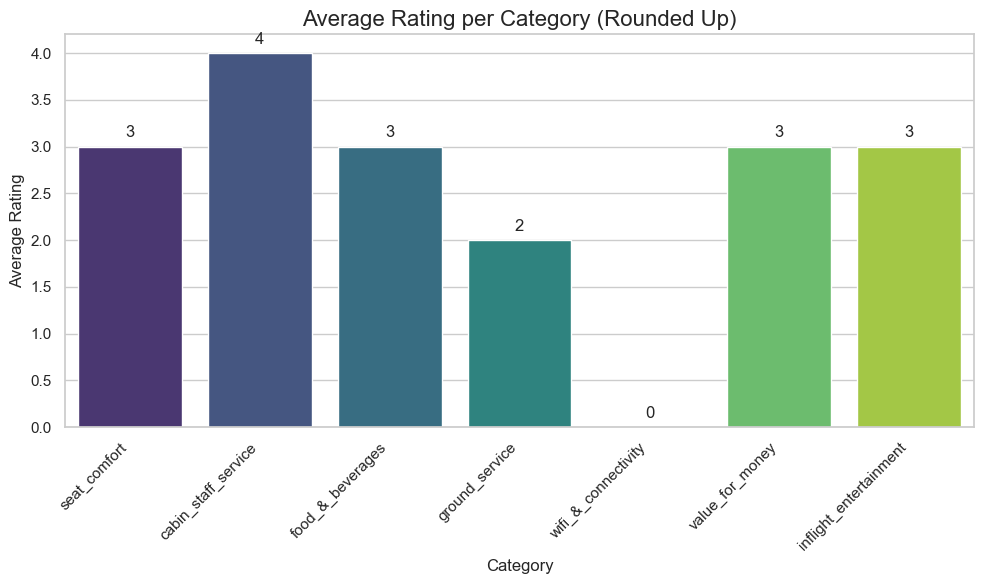

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average rating for each category and round up to a whole number
average_ratings_by_category = np.ceil(reviews_df[rating_columns].mean())

# Set the style of the plot for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_ratings_by_category.index, y=average_ratings_by_category.values, palette="viridis")

# Add labels and title
plt.title("Average Rating per Category (Rounded Up)", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on the bars
for i in range(len(average_ratings_by_category)):
    bar_plot.text(i, average_ratings_by_category.values[i] + 0.1, str(int(average_ratings_by_category.values[i])), 
                  ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# What is the average overall rating of Air New Zealand based on customer reviews?

In [14]:
# Convert ratings to numeric if they are in string format
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')

# Calculate the average rating
average_rating = reviews_df['rating'].mean()
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 5.25


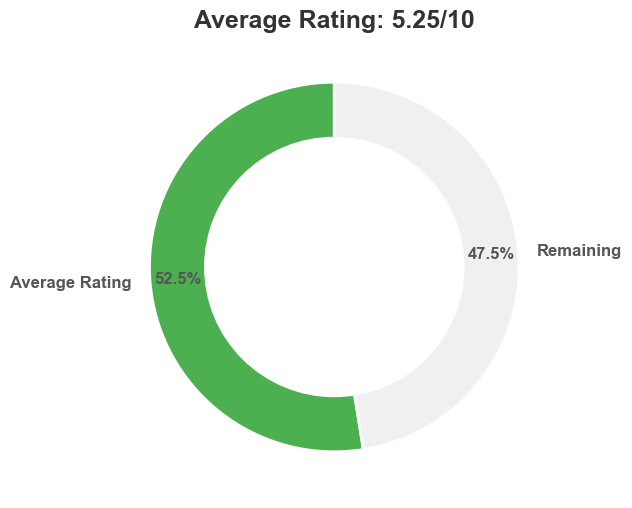

In [15]:
# Data for the donut chart
labels = ['Average Rating', 'Remaining']
sizes = [average_rating, 10 - average_rating]
colors = ['#4caf50', '#f0f0f0']  

# Plot a donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',
       pctdistance=0.85, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=1.25)
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title(f'Average Rating: {average_rating:.2f}/10', fontsize=18, color='#333', fontweight='bold')

# Customize the font of labels
plt.setp(ax.texts, fontweight='bold', color='#555', fontsize=12)

# Display the chart
plt.show()


# How do missing WiFi & Connectivity Ratings affect the overall average rating?

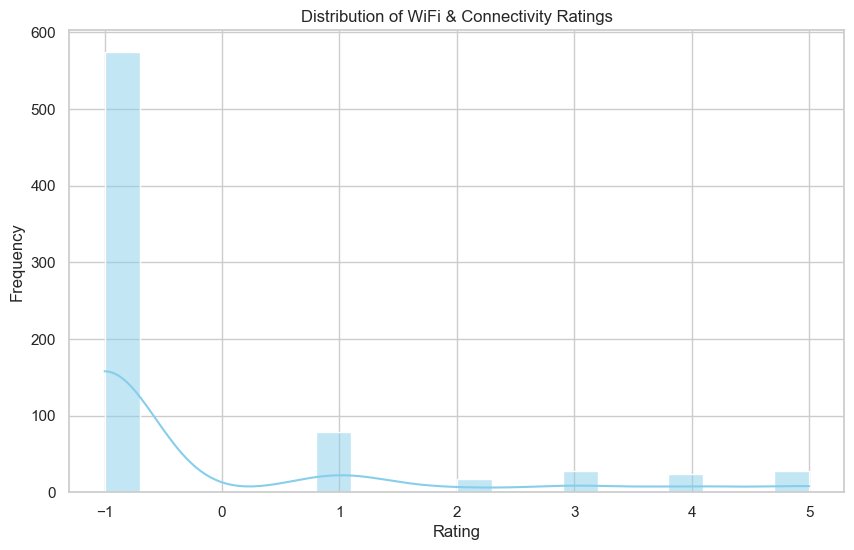

In [30]:
# Plot distribution of 'wifi_&_connectivity' ratings
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['wifi_&_connectivity'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of WiFi & Connectivity Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [31]:
# Count of -1.0 values in 'wifi_&_connectivity'
negative_count = (reviews_df['wifi_&_connectivity'] == -1.0).sum()
total_count = len(reviews_df)
print(f"Number of -1.0 ratings: {negative_count}")
print(f"Total number of ratings: {total_count}")


Number of -1.0 ratings: 574
Total number of ratings: 749


In [32]:
# Filter out -1.0 values and calculate the mean
valid_wifi_ratings = reviews_df[reviews_df['wifi_&_connectivity'] != -1.0]['wifi_&_connectivity']
average_valid_wifi_rating = valid_wifi_ratings.mean()

print(f"Average WiFi & Connectivity Rating (excluding -1.0): {average_valid_wifi_rating}")


Average WiFi & Connectivity Rating (excluding -1.0): 2.4457142857142857


/var/folders/zc/zmsjc2n90lg57tm5x4g9t1rw0000gn/T/ipykernel_5564/2565849431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")


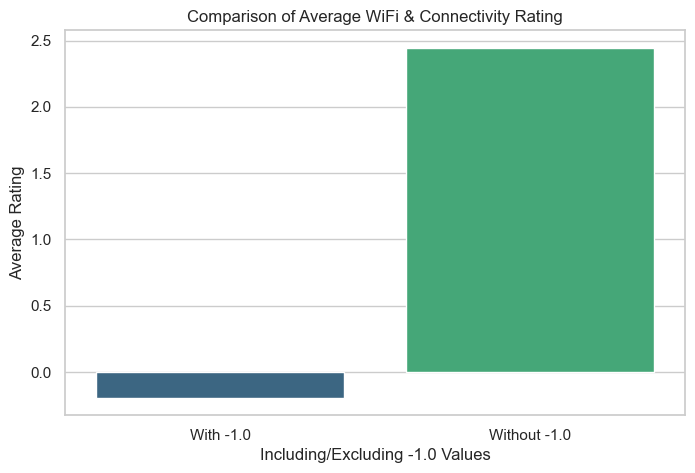

In [33]:
# Data for comparison
average_ratings_comparison = pd.Series({
    'With -1.0': reviews_df['wifi_&_connectivity'].mean(),
    'Without -1.0': average_valid_wifi_rating
})

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=average_ratings_comparison.index, y=average_ratings_comparison.values, palette="viridis")
plt.title("Comparison of Average WiFi & Connectivity Rating")
plt.xlabel("Including/Excluding -1.0 Values")
plt.ylabel("Average Rating")
plt.show()
